In [702]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing

In [703]:
df = pd.read_csv('./feifeiin3csv2.csv')
df.dropna()
df2.dropna()

,pain_max,gender,job,age,marriage,pain_min,fee,days,family_numnum
0,5.0,0,5,52,9,0.0,28036.98,18,1
1,0.0,0,0,65,9,0.0,383549.22,46,0
2,0.0,0,0,43,9,0.0,383549.22,46,0
3,0.0,0,5,49,9,0.0,42413.11,21,0
4,3.0,0,5,52,9,0.0,29759.94,33,1
...,...,...,...,...,...,...,...,...,...
4279,3.0,0,1,42,9,0.0,52698.00,28,0
4280,3.0,1,5,50,9,0.0,37094.50,14,0
4281,7.0,0,1,42,9,0.0,51976.83,27,0
4282,0.0,0,1,44,9,0.0,51406.39,23,0


In [704]:
df2 = df[['pain_max', 'gender', 'job', 'age', 'marriage ',
       'pain_min', 'fee', 'days', 'family_numnum']]
df = df[['pain_max', 'gender', 'job', 'age', 'marriage ',
       'pain_min', 'fee', 'days', 'family_numnum']]

# Apply one-hot encoder to each column with categorical data
gender_cols = ['gender']
marriage_cols = ['marriage ']
job_cols = ['job']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df2[gender_cols]))
OH_cols.index = df.index
num_X = df.drop(gender_cols, axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
df = OH_X
df.columns = ['pain_max', 'job', 'age', 'marriage ', 'pain_min', 'fee',
       'days', 'family_numnum','female','male']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df2[marriage_cols]))
OH_cols.index = df.index
num_X = df.drop(marriage_cols, axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)

df =OH_X
df.columns = ['pain_max', 'job', 'age', 'pain_min', 'fee',
       'days', 'family_numnum','female','male','single','marriaged','divorced','m_unknown']

OH_encoder = OneHotEncoder(handle_unknown='ignore', sparse=False)
OH_cols = pd.DataFrame(OH_encoder.fit_transform(df2[job_cols]))
OH_cols.index = df.index
num_X = df.drop(job_cols, axis=1)
OH_X = pd.concat([num_X, OH_cols], axis=1)
df =OH_X
df.columns = ['pain_max', 'age', 'pain_min', 'fee',
       'days', 'family_numnum','female','male','single','marriaged','divorced','m_unknown','worker','farmer','retired','stu','culture','house','info','free','none']

#Normalization
x = df.values 
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df = df.dropna()
df.columns = ['pain_max', 'age', 'pain_min', 'fee',
       'days', 'family_anumnum','female','male','single','marriaged','divorced','m_unknown','worker','farmer','retired','stu','culture','house','info','free','none']
       

## t-SNE

In [707]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, ensemble, discriminant_analysis, random_projection, neighbors
import seaborn as sns
# t-SNE embedding of the digits dataset
tsne = manifold.TSNE(n_components=2,perplexity = 45, init='pca', random_state=0)
X_tsne = tsne.fit_transform(df)


for i in range(0,5):
  centroids_series = pd.Series(centroids[i], index = df.columns)
  df = df.append(centroids_series, ignore_index=True)
marker_cent = []

for i in range(4245):
  if i<=4239:
    marker_cent.append(0)
  else:
    marker_cent.append(255)

X_tsne_2 = tsne.fit_transform(centroids)
tsne_df = pd.DataFrame(data=X_tsne)
tsne_df['mm'] = marker_cent
sns.scatterplot(data = tsne_df[:2000], x = 0, y=1,hue ='mm')
sns.scatterplot(data = tsne_df[-5:], x = 0, y=1,hue ='mm')


ValueError: ignored

In [680]:
# pca = PCA()
# pca.fit(scaled_data)
# pca_data = pca.transform(scaled_data)

## PCA

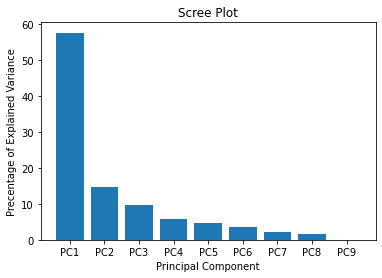

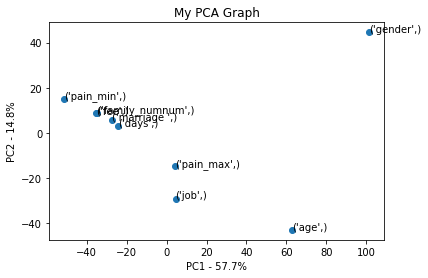

In [708]:
per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]

plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Precentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

pca_df = pd.DataFrame(pca_data, index=[['pain_max', 'gender', 'job', 'age', 'marriage ',
       'pain_min', 'fee', 'days', 'family_numnum']],columns=labels)
plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('My PCA Graph')
plt.xlabel('PC1 - {0}%'.format(per_var[0]))
plt.ylabel('PC2 - {0}%'.format(per_var[1]))
 
for sample in pca_df.index:
    plt.annotate(sample, (pca_df.PC1.loc[sample], pca_df.PC2.loc[sample]))
 
plt.show()

df = df.dropna()
df2 = df2.dropna()

## KMEANS

In [664]:

import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from pandas import DataFrame

#[ 'pain_max', 'gender', 'job', 'age', 'marriage ',
#      'pain_min', 'fee', 'days', 'family_numnum']


Data = {
        'x1':df['pain_max'],
        'x4':df['age'],
        'x6':df['pain_min'],
        'x7':df['fee'],
        'x8':df['days'],
        'x9':df['family_numnum'],
        'x10':df['female'],
        'x11':df['male'],
        'x12':df['single'],
        'x13':df['marriaged'],
        'x14':df['divorced'],
        'x15':df['m_unknown'],
        'x16':df['worker'],
        'x17':df['farmer'],
        'x18':df['retired'],
        'x19':df['stu'],
        'x20':df['culture'],
        'x21':df['house'],
        'x22':df['info'],
        'x23':df['free'],
        'x24':df['none']
        }

df = DataFrame(Data,columns=['x1','x4','x6','x7','x8','x9','x10','x11','x12','x13','x14','x15','x16','x17','x18','x19','x20','x21','x22','x23','x24'])
df = df.dropna()
kmeans = KMeans(n_clusters=5).fit(df)
centroids = kmeans.cluster_centers_

print(min_max_scaler.inverse_transform(centroids))
#print(centroids)


in_centroids = min_max_scaler.inverse_transform(centroids)
df3 = pd.DataFrame(data=in_centroids)

[[ 2.42049235e+00  5.48715902e+01  1.27079175e-01  6.31241186e+04
   2.72807718e+01  4.23819029e-01  1.00000000e+00 -2.04281037e-14
   3.32667997e-03  9.43446440e-01  5.32268796e-03  4.79041916e-02
   2.80771790e-01  2.64138390e-01  5.98802395e-02  6.65335995e-04
   6.65335995e-02  2.40851630e-01  4.85695276e-02  4.65735196e-03
   3.39321357e-02]
 [ 2.67892504e+00  5.87043847e+01  1.31541726e-01  1.02158157e+05
   3.95700141e+01  5.02121641e-01 -2.38697950e-15  1.00000000e+00
   9.90099010e-03  9.32107496e-01  2.82885431e-03  5.51626591e-02
   1.00000000e+00 -5.82867088e-16  5.68989300e-16  1.17093835e-17
  -1.52655666e-15 -3.99680289e-15 -4.71844785e-16 -7.11236625e-17
   1.35308431e-16]
 [ 2.59498681e+00  5.96583113e+01  1.33245383e-01  4.07742061e+04
   2.06609499e+01  3.61477573e-01 -2.72004641e-15  1.00000000e+00
   1.84696570e-02  9.53825858e-01  3.95778364e-03  2.37467018e-02
  -2.22044605e-15 -1.36002321e-15  3.13984169e-01  6.59630607e-03
   4.16886544e-01 -4.16333634e-15  1.5

## Others

In [670]:
class patients_in2out:
  gender = 0
  gender_out = ""
  marriage = 0
  marriage_out =""
  job = 0
  job_out = ""
  def __init__(self,gender,marriage,job):
    if gender == 0:
      gender_out = "女"
    else:
      gender_out = "男"

    if marriage == 0:
      marriage_out = "未婚"
    elif marriage == 1:
      marriage_out = "已婚"
    elif marriage == 2:
      marriage_out =="离异"
    
  def get_job(self,job):
    return self.job_out

  def get_marriage(self,job):
    return self.marriage_out

  def get_gender(self,job):
   return self.gender_out


